In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import SimpleITK as sitk
import numpy as np
import os

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
PATH_TO_EVALUATION_DATA = "./contours_compare_test/all_modalities"
PATH_TO_GROUND_TRUTHS = f"{PATH_TO_EVALUATION_DATA}/ground_truth"
PATH_TO_MODEL_PREDICTIONS = f"{PATH_TO_EVALUATION_DATA}/model_output"

In [3]:
uniquesgt = [2]
uniquesmp = [2]

test = np.array([[1]])


for label in [1, 2, 3]:
    if label not in uniquesgt and \
       label not in uniquesmp:
        test = np.insert(test, label - 1, [0 for _ in range(len(test[0]))], axis = 0)
        test = np.insert(test, label - 1, [0 for _ in range(len(test))], axis = 1)  

test

array([[0, 0, 0],
       [0, 1, 0],
       [0, 0, 0]])

### Voxel classification under/overestimation confusion matrix

In [40]:
output_cm = np.zeros((3, 3))
output_cm = np.zeros((4, 4))

num_cases = len(os.listdir(PATH_TO_MODEL_PREDICTIONS))

for patient_file in os.listdir(PATH_TO_MODEL_PREDICTIONS):
    gt = sitk.ReadImage(f"{PATH_TO_GROUND_TRUTHS}/{patient_file}")
    mp = sitk.ReadImage(f"{PATH_TO_MODEL_PREDICTIONS}/{patient_file}")

    gt = sitk.GetArrayFromImage(gt)
    mp = sitk.GetArrayFromImage(mp)

    gt = gt.flatten()
    mp = mp.flatten()


    # Mark indices that have a 0 (background) value in either the ground truth or prediction
    # marked_indices = np.logical_or(gt == 0, mp == 0)
    # # remove those indices in both arrays
    # gt = gt[~marked_indices]
    # mp = mp[~marked_indices]

    if len(gt) == 0 or \
       len(mp) == 0:
        print("Ground truth or prediction is only background")
        continue

    print(np.unique(gt))
    print(np.unique(mp))

    cm = confusion_matrix(gt, mp, normalize='true', labels=[0, 1, 2, 3])
    output_cm += cm
    print("\n--------------------\n")

print("Final cm:")
print(output_cm)
print("divided by ", num_cases)
output_cm = output_cm/num_cases

print(output_cm)




[0. 1. 2.]
[0 1 2 3]

--------------------

[0. 1. 2. 3.]
[0 1 2]

--------------------

[0. 1. 2.]
[0 1 2]

--------------------

[0. 1. 2.]
[0 1]

--------------------

[0. 1. 2. 3.]
[0 1 2]

--------------------

[0. 1. 2. 3.]
[0 1]

--------------------

[0. 1. 2. 3.]
[0 1]

--------------------

[0. 1. 2. 3.]
[0 1 2]

--------------------

[0. 1. 2. 3.]
[0 1 2 3]

--------------------

[0. 1. 2.]
[0 1]

--------------------

[0. 1. 2.]
[0 1 2]

--------------------

[0. 1. 2.]
[0 1]

--------------------

[0. 1. 2.]
[0 1]

--------------------

[0. 1.]
[0 1 2]

--------------------

[0. 1. 2. 3.]
[0 1 2]

--------------------

[0. 1. 2. 3.]
[0 1 2]

--------------------

[0. 1. 2.]
[0 1]

--------------------

[0. 1. 2. 3.]
[0]

--------------------

[0. 1. 2.]
[0 1 2]

--------------------

[0. 1. 2.]
[0]

--------------------

[0. 1.]
[0 1]

--------------------

[0. 1.]
[0 1 2]

--------------------

[0. 1. 2. 3.]
[0 1 2]

--------------------

[0. 1.]
[0 1 2]

----------------

In [33]:
first_patient_file = os.listdir(PATH_TO_MODEL_PREDICTIONS)[0]
gt = sitk.ReadImage(f"{PATH_TO_GROUND_TRUTHS}/{first_patient_file}")
mp = sitk.ReadImage(f"{PATH_TO_MODEL_PREDICTIONS}/{first_patient_file}")

In [34]:
gt = sitk.GetArrayFromImage(gt)
mp = sitk.GetArrayFromImage(mp)

In [ ]:
# Manual messing around..
output = np.zeros_like(gt)

output = np.where((gt == 1) & (mp == 1), 1,
         np.where((gt == 1) & (mp == 2), 2,
         np.where((gt == 1) & (mp == 3), 3,
         np.where((gt == 2) & (mp == 1), 4,
         np.where((gt == 2) & (mp == 2), 5,
         np.where((gt == 2) & (mp == 3), 6,
         np.where((gt == 3) & (mp == 1), 7,
         np.where((gt == 3) & (mp == 2), 8,
         np.where((gt == 3) & (mp == 3), 9, 0)))))))))

np.unique(output, return_counts=True)


In [35]:
# Flattening the image arrays & removing the pixels where a pixel
# in either the ground truth or the model prediction is a 0 (background)
# as in this case only the cases of overlap, so lesion-classified voxels
# in both arrays at some voxel, is of interest
gt = gt.flatten()
mp = mp.flatten()

# marked_indices = np.logical_or(gt == 0, mp == 0)

# gt = gt[~marked_indices]
# mp = mp[~marked_indices]

In [36]:
cm = confusion_matrix(gt, mp, normalize='true')
cm

array([[9.97618835e-01, 1.05244867e-04, 2.27592025e-03, 0.00000000e+00],
       [3.66064007e-01, 2.38570241e-01, 3.82169576e-01, 1.31961762e-02],
       [5.23898782e-01, 8.43486410e-03, 4.67666354e-01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

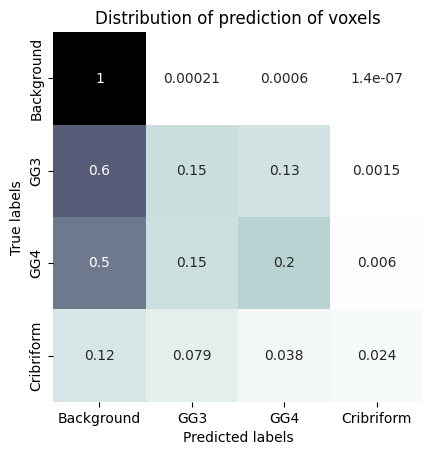

In [41]:
sns.heatmap(output_cm,
            xticklabels = ["Background", "GG3", "GG4", "Cribriform"],
            yticklabels = ["Background", "GG3", "GG4", "Cribriform"],
            annot = True,
            cbar = False,
            square = True,
            cmap = "bone_r")

plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Distribution of prediction of voxels")

plt.show()

### Forground/background classification confusion matrix

In [42]:
output_cm_fgbg = np.zeros((2, 2))

for patient_file in os.listdir(PATH_TO_MODEL_PREDICTIONS):
    gt = sitk.ReadImage(f"{PATH_TO_GROUND_TRUTHS}/{patient_file}")
    mp = sitk.ReadImage(f"{PATH_TO_MODEL_PREDICTIONS}/{patient_file}")

    gt = sitk.GetArrayFromImage(gt)
    mp = sitk.GetArrayFromImage(mp)

    gt = gt.flatten()
    mp = mp.flatten()

    # Transform both delineations in to binary ones, distinguishing only
    # between foreground (lesion) and background (no lesion)
    gt = np.where(gt != 0, 1, 0)
    mp = np.where(mp != 0, 1, 0)

    cm = confusion_matrix(gt, mp, normalize = 'true', labels=[0, 1])
    print(cm)
    print("\n--------------------\n")

    output_cm_fgbg += cm

print("Final cm:")
print(output_cm_fgbg)
print("divided by ", num_cases)
output_cm_fgbg = output_cm_fgbg/num_cases

print(output_cm_fgbg)


[[0.99761883 0.00238117]
 [0.38181648 0.61818352]]

--------------------

[[9.99680204e-01 3.19795827e-04]
 [6.04358156e-01 3.95641844e-01]]

--------------------

[[9.99786486e-01 2.13513897e-04]
 [5.77292680e-01 4.22707320e-01]]

--------------------

[[9.99665024e-01 3.34975520e-04]
 [3.31538462e-01 6.68461538e-01]]

--------------------

[[9.99840319e-01 1.59680671e-04]
 [7.00204871e-01 2.99795129e-01]]

--------------------

[[9.99833090e-01 1.66910302e-04]
 [4.92156863e-01 5.07843137e-01]]

--------------------

[[9.99765591e-01 2.34409495e-04]
 [7.38583719e-01 2.61416281e-01]]

--------------------

[[9.99819784e-01 1.80215835e-04]
 [9.37583001e-01 6.24169987e-02]]

--------------------

[[9.99896997e-01 1.03003210e-04]
 [6.66529436e-01 3.33470564e-01]]

--------------------

[[9.99845883e-01 1.54117425e-04]
 [9.11157025e-01 8.88429752e-02]]

--------------------

[[9.99932582e-01 6.74182523e-05]
 [4.33399602e-01 5.66600398e-01]]

--------------------

[[9.99925161e-01 7.4838626

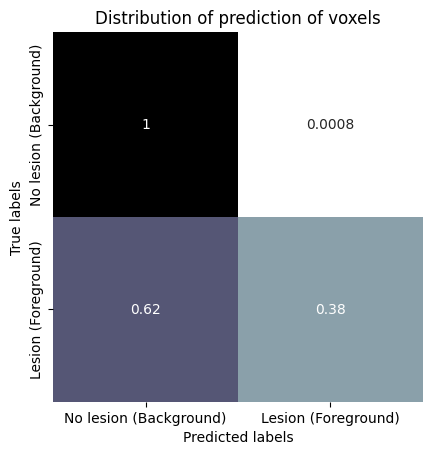

In [43]:
sns.heatmap(output_cm_fgbg,
            xticklabels = ["No lesion (Background)", "Lesion (Foreground)"],
            yticklabels = ["No lesion (Background)", "Lesion (Foreground)"],
            annot = True,
            annot_kws = {
                # "color": 'red',
            },
            cbar = False,
            square = True,
            cmap = "bone_r")

plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Distribution of prediction of voxels")

plt.show()